# Máquinas de vectores soporte


## Introducción

En este Notebook vamos a analizar el funcionamiento del algoritmo de [máquinas de vectores soporte](http://scikit-learn.org/stable/modules/svm.html).


## Máquinas de vectores soporte (SVM)

Del inglés, *Support Vector Machines*. Originalmente desarrolladass para abordar problemas de clasificación linealmente separables, las SVMs se definen como un clasificador lineal que generan una frontera de separación con máximo margen, es decir con máxima separación entre las muestras (de cada clase) y el plano de separación. En la figura, los planos $H_2$ y $H_3$ permiten separar perfectamente las clases, sin embargo, $H_3$ realiza esta separación con máximo margen.

<img src="./figs/Svm_separating_hyperplanes.png"> Fuente: [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine), figura realizada por ZackWeinberg.

La ventaja de definir este hiperplano de separación de máximo margen es doble:

1. Proporciona una frontera de separación que generaliza muy bien. Las SVMs son uno de los algoritmos con mejores prestaciones en problemas de clasificación. 

2. La frontera de separación se define únicamente en función de las muestras más cercanas al hiperplano de separación, las cuales se denominan *vectores soporte*, que en general son un subconjunto reducido de las muestras del problema, lo que lo convierte en un algoritmo eficiente. 

El algoritmo SVM puede extenderse fácilmente a problemas no lineales utilizando el truco del núcleo o [*Kernel Trick*](https://en.wikipedia.org/wiki/Kernel_method). El truco del núcleo consiste en aplicar una transformación $\phi(\mathbf{x})$ sobre los datos para llevarlos a un espacio de dimensionalidad mayor, donde presumiblemente los datos podrán ser linealmente separados. Sobre ese nuevo espacio, se aplica el algoritmo SVM. 

<img src="./figs/Kernel_Machine.png"> Fuente: [Wikipedia](https://en.wikipedia.org/wiki/Kernel_method), figura realizada por Zirguezi.

Esta transformación no es nueva para nosotros. Si recordamos el algoritmo de regresión logística, tuvimos que incluir nuevas variables en forma de variables polinómicas (lo que en otras palabras es aumentar la dimensionalidad del problema) para poder abordar problemas de clasificación no lineales. 

¿Por qué se llama truco del núcleo? Porque realmente no tenemos que conocer la función de transformación $\phi(\mathbf{x})$, sino únicamente su producto escalar, que denominamos núcleo:

$$k(\mathbf{x_i},\mathbf{x_j}) = <\phi(\mathbf{x_i}),\phi(\mathbf{x_j})>$$

La ventaja de las SVMs es que el truco del núcleo puede incluirse de forma natural en su formulación, dando como resultado un algoritmo muy versátil y potente. Algunos de los [núcleos](http://scikit-learn.org/stable/modules/svm.html#svm-kernels) más utilizados son:

- Lineal (lo que equivale a no introducir transformación sobre los datos): $k(\mathbf{x_i},\mathbf{x_j}) = \mathbf{x_i}\cdot\mathbf{x_j}$.

- RBF (Radial Basis Function), o kernel gaussiano: $k(\mathbf{x_i},\mathbf{x_j}) = e^{-\gamma||\mathbf{x_i}-\mathbf{x_j}||^2}$, donde $\gamma$ es un parámetro libre que hay que fijar a priori.

- Polinómico: $k(\mathbf{x_i},\mathbf{x_j}) = \left(\gamma(\mathbf{x_i}\cdot\mathbf{x_j}) + r \right)^d$, donde $r$ y $\gamma$ son parámetros libres que hay que fijar a priori

In [1]:
# cargamos librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
from sklearn import svm
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
db = pd.read_csv("ohlcdata.csv")
db= db.dropna()

In [3]:
y = np.where(db['Close'].shift(-1) > db['Close'],1,-1)
db['Open-Close'] = db.Open - db.Close
db['High-Low'] = db.High - db.Low

In [4]:
X=db[['Open-Close','High-Low']]
split_percentage = 0.8
split = int(split_percentage*len(db))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [5]:
clf=svm.SVC(kernel='linear',probability=True)
clf.fit(X_train,y_train)
accuracy_train = accuracy_score(y_train, clf.predict(X_train))
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 83.33%
Test Accuracy: 100.00%


* Si tenemos un valor elevado del coste $C$, estaremos penalizando mucho los errores, y por tanto se obtienen fronteras más ajustadas (mayor complejidad, mayor riesgo de overfitting, potenciales mejores prestaciones). 

* De otro lado, si tenemos un valor pequeño del coste $C$, no daremos mucha importancia a los errores, y por tanto se obtienen fronteras menos ajustadas (menor complejidad, menor riesgo de overfitting, potenciales peores prestaciones). 

Se puede modificar el coste $C$ mediante el parámetro de mismo nombre en scikit-learn. Por defecto, $C=1$.

In [6]:
clf=svm.SVC(kernel='linear',probability=True,C = 0.0001)
clf.fit(X_train,y_train)
accuracy_train = accuracy_score(y_train, clf.predict(X_train))
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 81.25%
Test Accuracy: 84.62%


In [7]:
clf=svm.SVC(kernel='linear',C = 1e3)
clf.fit(X_train,y_train)
accuracy_train = accuracy_score(y_train, clf.predict(X_train))
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 85.42%
Test Accuracy: 92.31%


In [ ]:
clf=svm.SVC(kernel='rbf',gamma = 2)
clf.fit(X_train,y_train)
accuracy_train = accuracy_score(y_train, clf.predict(X_train))
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))

## Conclusiones

El algoritmo SVM destaca por:

1. Proporciona muy buenas prestaciones en clasificación.
2. Versatilidad: utilización de núcleos.
3. Como contrapartida, la búsqueda de parámetros libres ($C$) puede ser costosa computacionalmente

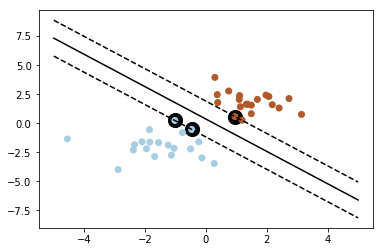

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20
# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)
clf.predict(X)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# generate the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
# plot the hyper planes
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='black')

# plot all points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()